In [1]:
%%capture
%cd ..

In [2]:
# Import data

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from utils.constants import white_list

In [3]:
ds_root = 'dataset/cleaned'

In [ ]:
# PLOT GRAFICI DI CARICA

# Lista dei colori che vuoi utilizzare per le curve
colors = ['red', 'orange', 'blue', 'green', 'purple', 'lightblue']


# Inizializza il plot
plt.figure()

# Lista per i nomi dei file
file_names = []

# Dizionario per memorizzare i risultati di ogni file
results_dict = {}

# Loop attraverso i file in ds_root
for i, file_name in enumerate(os.listdir(ds_root)):
    file_path = os.path.join(ds_root, file_name)
    if file_name.startswith('charge'):
        df = pd.read_csv(file_path)

        first_step_index_2 = df[df['Step_Index'] == 2].groupby('Cycle_Index').head(1)
        last_step_index_4 = df[df['Step_Index'] == 4].groupby('Cycle_Index').tail(1)
        
        cycle_indexes2 = first_step_index_2['Cycle_Index'].index  # ha indice riga e numero del ciclo
        cycle_indexes4 = last_step_index_4['Cycle_Index'].index

        first = []
        for i in cycle_indexes2:
            first.append(df.iloc[i, 6])

        last = []
        for i in cycle_indexes4:
            last.append(df.iloc[i, 6])

        result = [b - a for a, b in zip(first, last)]

        # Andiamo ad eliminare gli outliers, valori che hanno un valore molto differente dall'andamento
        filtered_vector = [result[0]]  # Inizializza il nuovo vettore con il primo elemento
        for i in range(1, len(result)):
            difference = abs(result[i] - result[i - 1])
            if difference <= 0.01: # Valori minori rendono la curva piu selettiva
                filtered_vector.append(result[i])
            # else:
            #     while i+1 < len(result) and difference > 0.04:
            #         difference = abs(result[i+1] - current)
            #         i = i+1
            #     if i < len(result): filtered_vector.append(result[i])
                

        # Stampa i valori delle differenze
        # print(filtered_vector)

        cs2x_part = file_name.split('charge-')[1].split('.csv')[0]
        file_names.append(cs2x_part)

        # Salva i risultati nel dizionario solo se non sono già presenti
        if cs2x_part not in results_dict:
            results_dict[cs2x_part] = result
        valori = []

        for j in range(len(filtered_vector)):
            val = (filtered_vector[j]/(1.1))
            val = val*100
            valori.append(val)
        # Ottieni l'indice del colore utilizzando il modulo
        color_index = len(file_names) - 1
        color = colors[color_index % len(colors)]

        # Traccia la curva utilizzando un colore dalla lista colors
        plt.plot(valori, label=f'{cs2x_part}', linestyle='-', color=color)

# Aggiungi titoli e legenda
plt.title('SOH trend')
plt.xlabel('Cycle')
plt.ylabel('SOH(%)')
plt.grid(True)
# Imposta l'asse x in modo che inizi da zero
plt.xlim(left=0)
# Sposta la legenda in alto a destra senza che esca dalla figura
plt.legend(file_names, loc='upper right', bbox_to_anchor=(1.2, 1.))

# Mostra il plot
plt.show()



[-1.4190466403961182, -1.4075453281402588, -1.4075453281402588, -1.4117567539215088, -1.413214921951294, -1.4083549976348877, -1.4083549976348877, -1.4081931114196782, -1.4102990627288818, -1.4132144451141357, -1.4148344993591313, -1.4149966239929204, -1.415482759475709, -1.415968656539917, -1.416616678237916, -1.416940689086915, -1.416778326034546, -1.417264699935913, -1.417102575302124, -1.417264699935913, -1.4159684181213383, -1.4112708568572998, -1.4102990627288818, -1.4093267917633057, -1.4091651439666748, -1.4091651439666748, -1.4143486022949223, -1.4098126888275146, -1.4090032577514648, -1.409002780914307, -1.4077069759368896, -1.4128906726837158, -1.414348840713501, -1.4090030193328857, -1.4090030193328857, -1.408354759216309, -1.4117567539215088, -1.4135384559631352, -1.4077069759368896, -1.4075453281402588, -1.4073832035064697, -1.4109470844268799, -1.412566900253296, -1.4133765697479248, -1.4138624668121338, -1.4149968624115, -1.4151585102081299, -1.4153206348419198, -1.4091

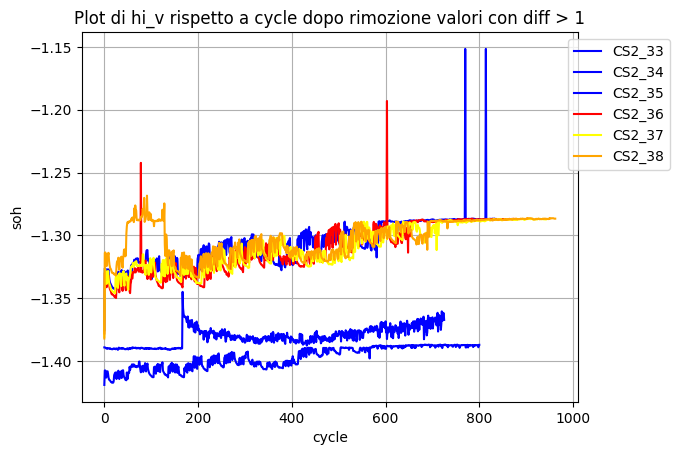

In [4]:
# PLOT DEI GRAFICI DI SCARICA

# Lista dei colori che vuoi utilizzare per le curve
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']

# Inizializza il plot
plt.figure()

# Lista per i nomi dei file
file_names = []

# Dizionario per memorizzare i risultati di ogni file
results_dict = {}

# Loop attraverso i file in ds_root
for i, file_name in enumerate(os.listdir(ds_root)):
    file_path = os.path.join(ds_root, file_name)
    if file_name.startswith('discharge'):
        df = pd.read_csv(file_path)

        first_step_index_7 = df[df['Step_Index'] == 7].groupby('Cycle_Index').head(1).index
        last_step_index_7 = df[df['Step_Index'] == 7].groupby('Cycle_Index').tail(1).index
    

        first1 = []
        for i in first_step_index_7:
            first1.append(df.iloc[i, 5])

        last1 = []
        for i in last_step_index_7:
            last1.append(df.iloc[i, 5])

        result1 = [b - a for a, b in zip(first1, last1)]

        filtered_vector_discharge = [result1[0]]  # Inizializza il nuovo vettore con il primo elemento
        for i in range(1, len(result1)):
            difference = abs(result1[i] - result1[i - 1])
            if difference <= 0.01: # Valori minori rendono la curva piu selettiva
                filtered_vector_discharge.append(result1[i])

        # Stampa i valori delle differenze
        # print(filtered_vector_discharge)
                
        cs2x_part = file_name.split('discharge-')[1].split('.csv')[0]
        file_names.append(cs2x_part)

        # Salva i risultati nel dizionario solo se non sono già presenti
        if cs2x_part not in results_dict:
            results_dict[cs2x_part] = result1

        print(filtered_vector_discharge)
        # Traccia la curva utilizzando un colore dalla lista colors
        plt.plot(filtered_vector_discharge, label=f'{cs2x_part}', linestyle='-', color=colors[i % len(colors)])


# Aggiungi titoli e legenda
plt.title('Plot di hi_v rispetto a cycle dopo rimozione valori con diff > 1')
plt.xlabel('cycle')
plt.ylabel('soh')
plt.grid(True)

# Sposta la legenda in alto a destra senza che esca dalla figura
plt.legend(file_names, loc='upper right', bbox_to_anchor=(1.2, 1.))

# Mostra il plot
plt.show()


In [ ]:
for i in range(len(result) - 1, 0, -1):
    
    if result[i - 1] <= result[i]:
        del result[i - 1]


valori = []
for j in range(len(result)):
    val = (result[j]/(1.1))
    val = val*100
    valori.append(val)



plt.plot(valori)

In [ ]:
# first_step_index_2 = cleaned[cleaned['Step_Index'] == 2].groupby('Cycle_Index').head(1)
# last_step_index_4 = cleaned[cleaned['Step_Index'] == 4].groupby('Cycle_Index').tail(1)
# cycle_indexes2 = first_step_index_2['Cycle_Index'].index # ha indice riga e numero del ciclo
# cycle_indexes4 = last_step_index_4['Cycle_Index'].index 

# first = []
# for i in cycle_indexes2:
#     first.append(cleaned.iloc[i,6])

# last = []
# for i in cycle_indexes4:
#     last.append(cleaned.iloc[i,6])
    
# result = [b - a for a, b in zip(first, last)]
# print(result)

# dim = len(result)
# print(dim)

# plt.plot(result)